In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [2]:
info = pd.read_csv("../csvs/random/Gaussian_Fits_266.csv", index_col=0)
info.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
0,1007,0.133196,5.587629,0.464593,0.014738,0.010563,2.423315e-08
1,1021,0.181262,6.003999,0.327314,0.010287,0.007410,5.811603e-09
2,1025,0.153687,5.794418,0.385985,0.012358,0.008756,1.170601e-08
3,1041,0.127597,5.730234,0.494415,0.015324,0.011150,2.919534e-08
4,10518,0.144064,6.465849,0.431597,0.013325,0.009608,1.638141e-08


In [6]:
significance_scores = pd.read_csv("../csvs/random/signficance_scores_new_scipy.csv")
significance_scores.head()

,ID,Anderson_P,KS_P
0,1007.0,0.186179,0.287798
1,1021.0,0.097986,0.164114
2,1025.0,0.187580,0.572890
3,1041.0,0.001000,0.000001
4,10518.0,0.001000,0.000185


In [7]:
ranked_scores = significance_scores.sort_values("KS_P", ascending=False)
ranked_scores.head()

,ID,Anderson_P,KS_P
150,2081.0,0.25,0.951672
131,19591.0,0.25,0.888173
152,2087.0,0.25,0.828219
141,2030.0,0.25,0.793158
13,1169.0,0.25,0.759370


In [8]:
def plot_random_hists( planet_systems,title=None):
    ncol, nrow = 3,len(planet_systems)//3
    if (len(planet_systems)%3 != 0):
        nrow +=1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data = pd.read_csv("../csvs/random/random_features/" + planet_sys, index_col=0)
    
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[1]
        # make guassian
        mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name + r': $\mu$=' +str("{0:.3f}".format(mean)) + r': $\sigma$='+ str("{0:.3f}".format(sigma)))
    plt.show()

['Sys_2081_1e8.csv', 'Sys_19591_1e8.csv', 'Sys_2087_1e8.csv', 'Sys_2030_1e8.csv', 'Sys_1169_1e8.csv', 'Sys_25_1e8.csv']


/home/naireen/Documents/pythonVirtualEnvs/ROB501/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


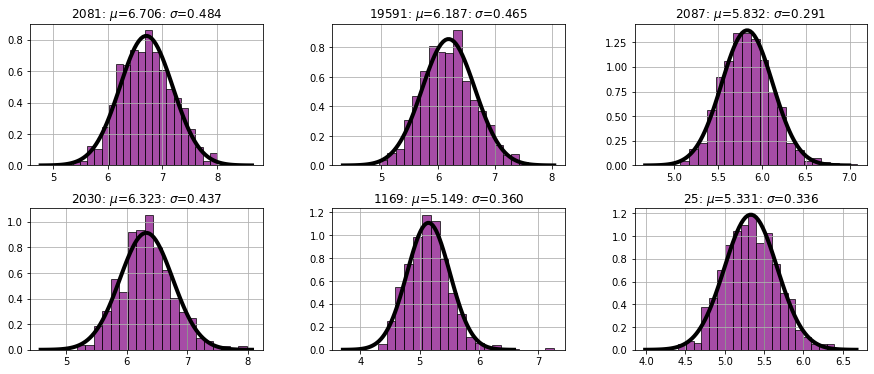

In [9]:
very_gaussian = ranked_scores.head(6)["ID"]
very_gaussian = ["Sys_{0}_1e8.csv".format(int(x))  for x in very_gaussian]
print (very_gaussian)
plot_random_hists(very_gaussian)